In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("train.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday

def day_period(h):
    if 0 <= h < 6:
        return "night"
    elif 6 <= h < 12:
        return "morning"
    elif 12 <= h < 18:
        return "afternoon"
    else:
        return "evening"

df["day_period"] = df["hour"].apply(day_period)

num_cols = df.select_dtypes(include=np.number).columns


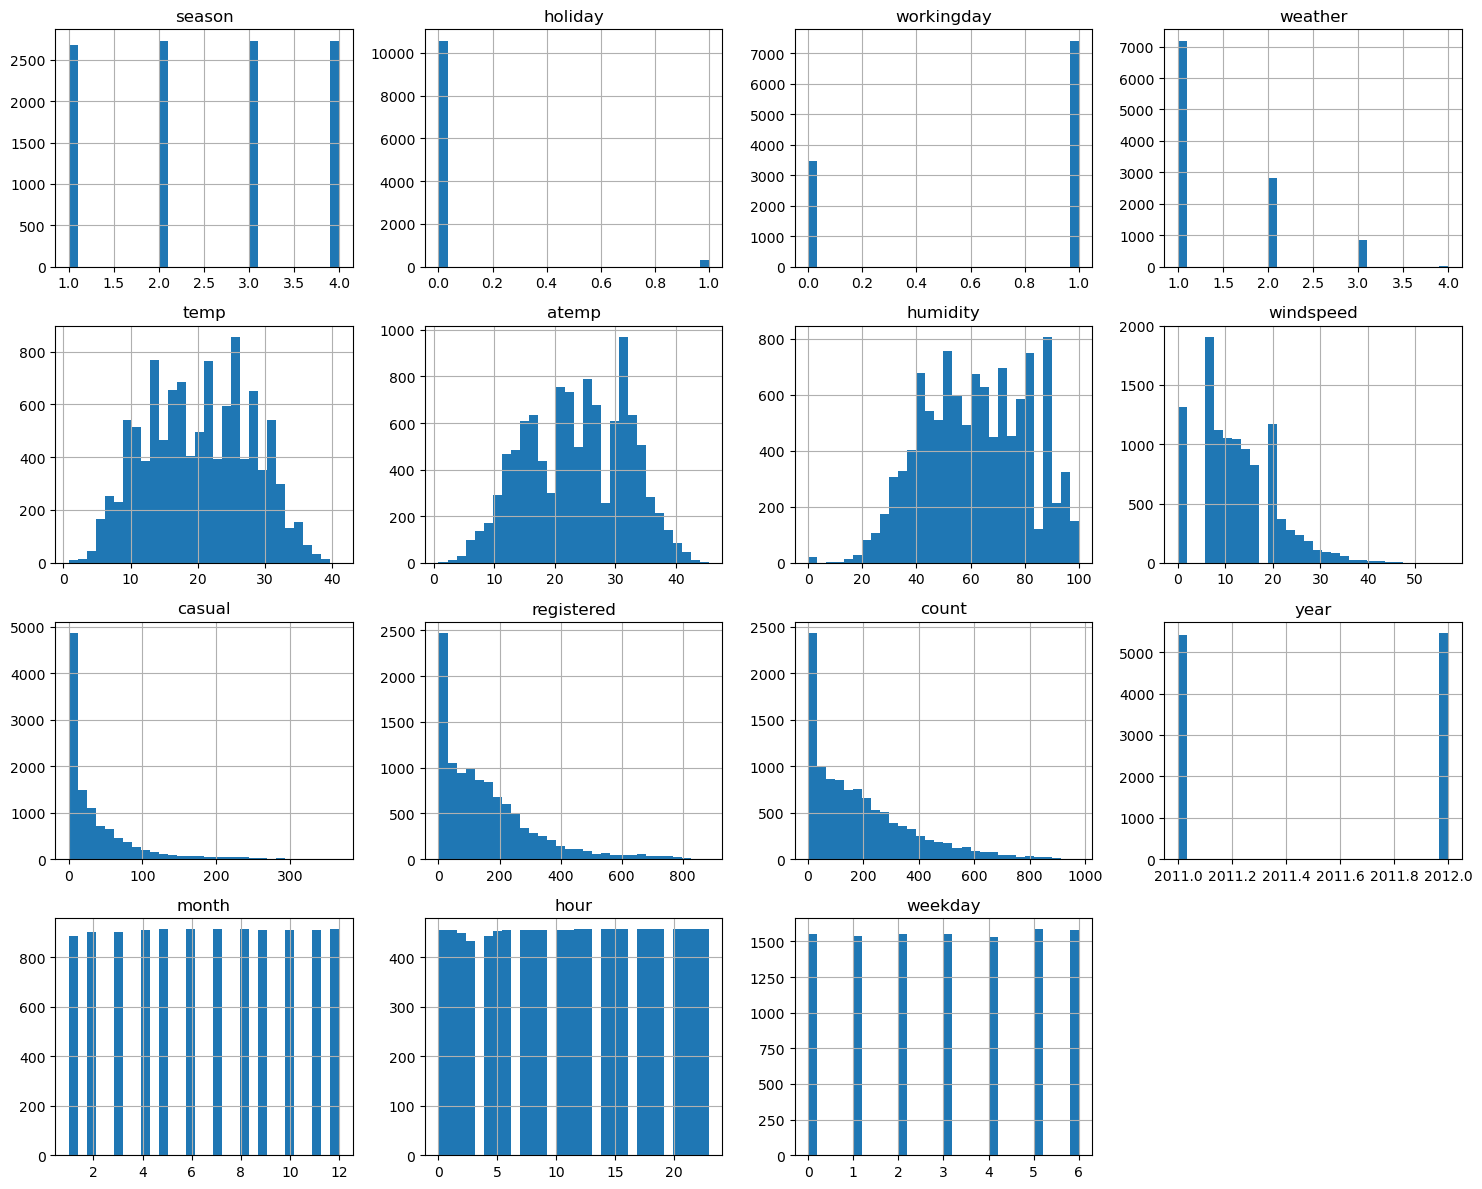

In [2]:
df[num_cols].hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()


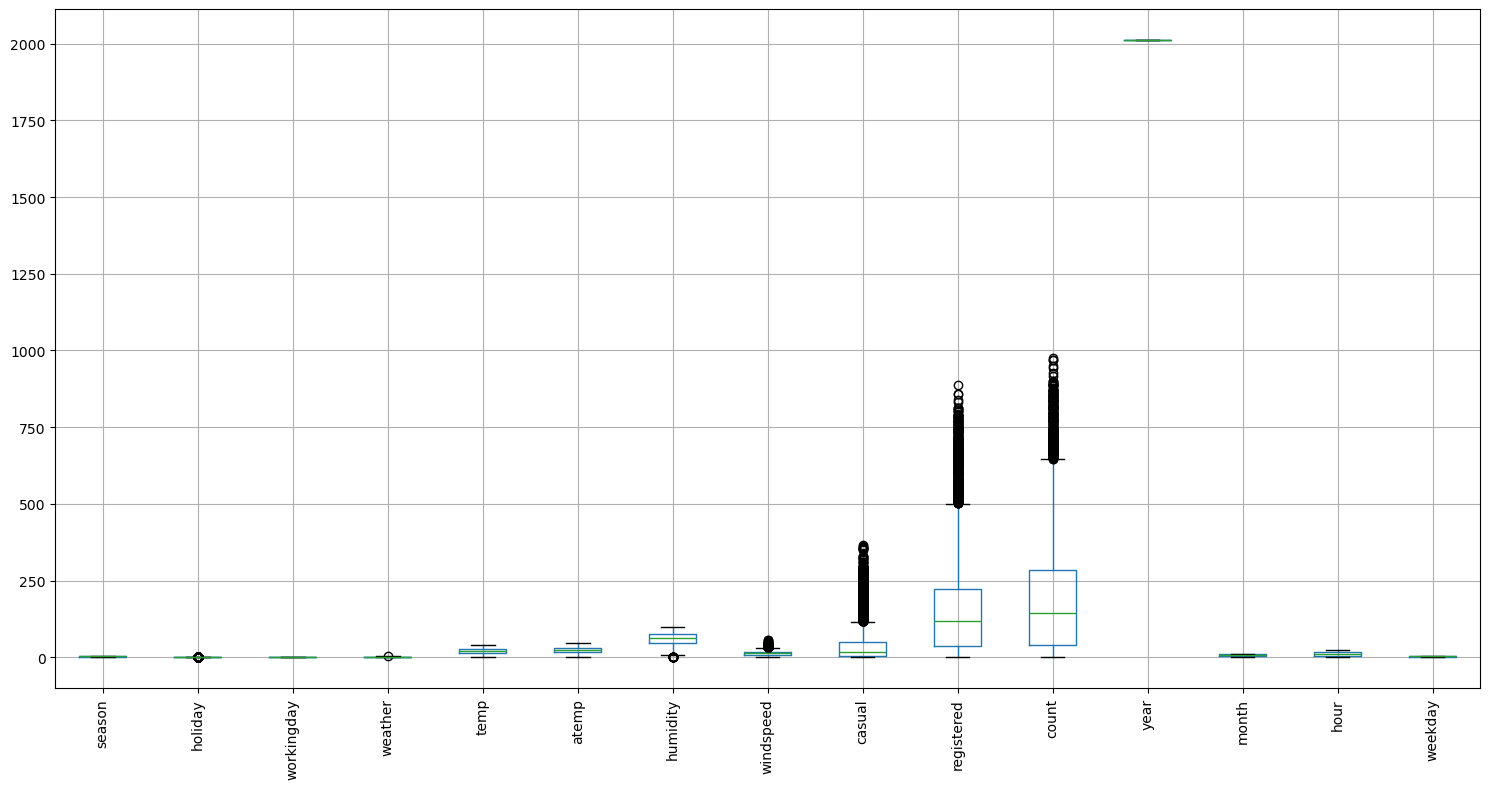

In [3]:
plt.figure(figsize=(15,8))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()


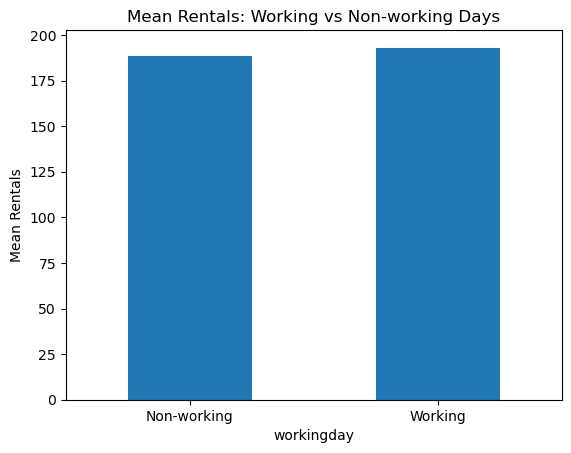

In [4]:
mean_working = df.groupby("workingday")["count"].mean()

mean_working.plot(kind="bar")
plt.xticks([0,1], ["Non-working", "Working"], rotation=0)
plt.ylabel("Mean Rentals")
plt.title("Mean Rentals: Working vs Non-working Days")
plt.show()


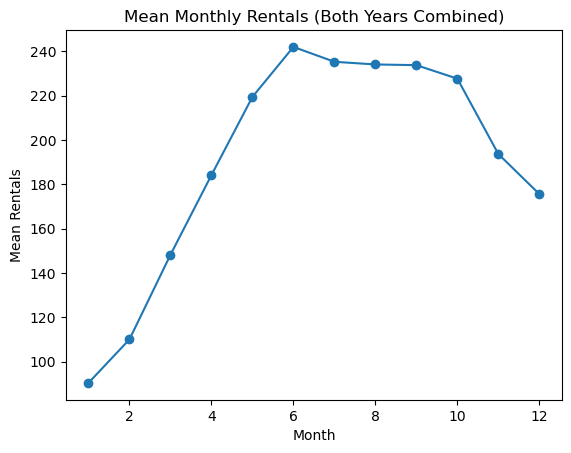

In [5]:
monthly_mean = df.groupby("month")["count"].mean()

monthly_mean.plot(marker="o")
plt.xlabel("Month")
plt.ylabel("Mean Rentals")
plt.title("Mean Monthly Rentals (Both Years Combined)")
plt.show()


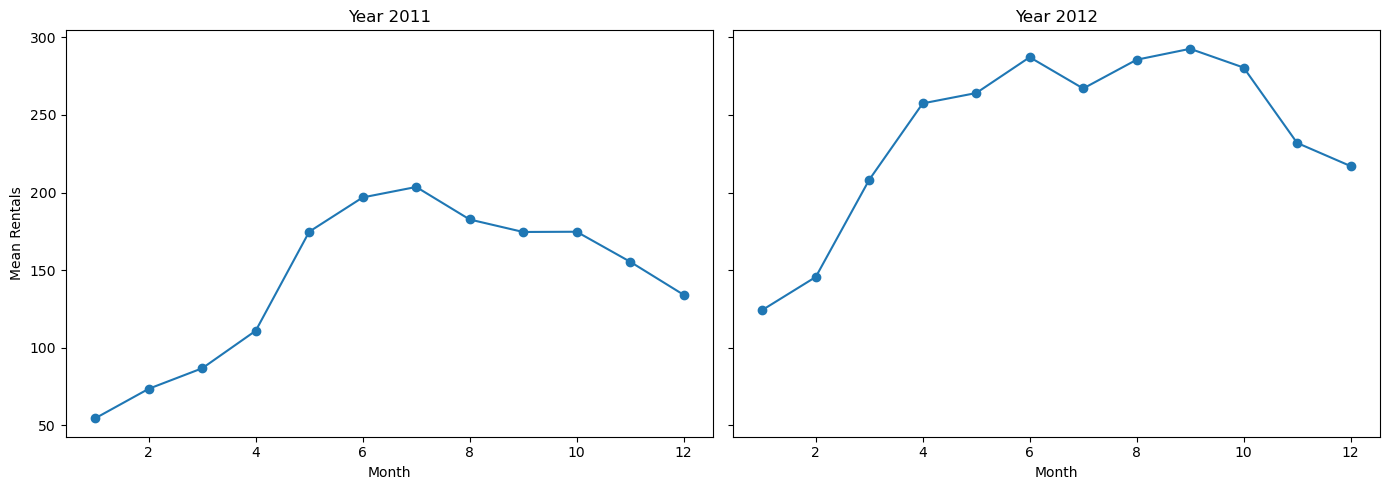

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

for ax, yr in zip(axes, sorted(df["year"].unique())):
    data = df[df["year"] == yr].groupby("month")["count"].mean()
    ax.plot(data.index, data.values, marker="o")
    ax.set_title(f"Year {yr}")
    ax.set_xlabel("Month")

axes[0].set_ylabel("Mean Rentals")
plt.tight_layout()
plt.show()


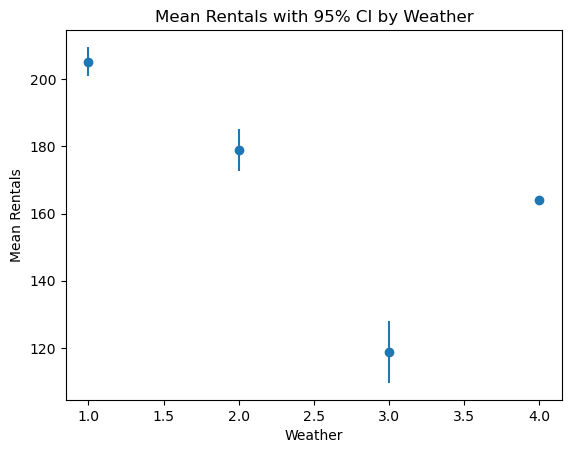

In [7]:
weather_stats = df.groupby("weather")["count"].agg(["mean", "std", "count"])
weather_stats["ci95"] = 1.96 * weather_stats["std"] / np.sqrt(weather_stats["count"])

plt.errorbar(
    weather_stats.index,
    weather_stats["mean"],
    yerr=weather_stats["ci95"],
    fmt="o"
)
plt.xlabel("Weather")
plt.ylabel("Mean Rentals")
plt.title("Mean Rentals with 95% CI by Weather")
plt.show()


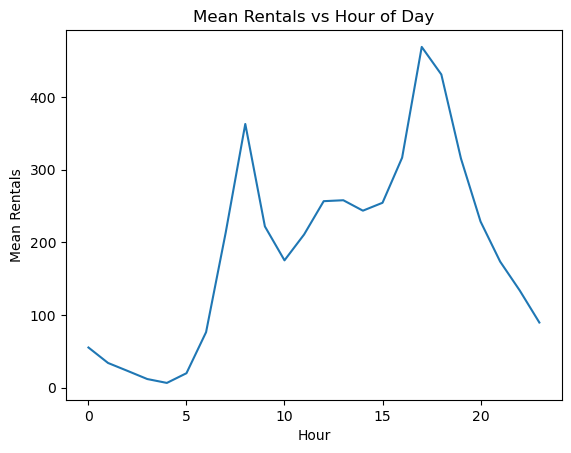

In [8]:
hourly_mean = df.groupby("hour")["count"].mean()

hourly_mean.plot()
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.title("Mean Rentals vs Hour of Day")
plt.show()


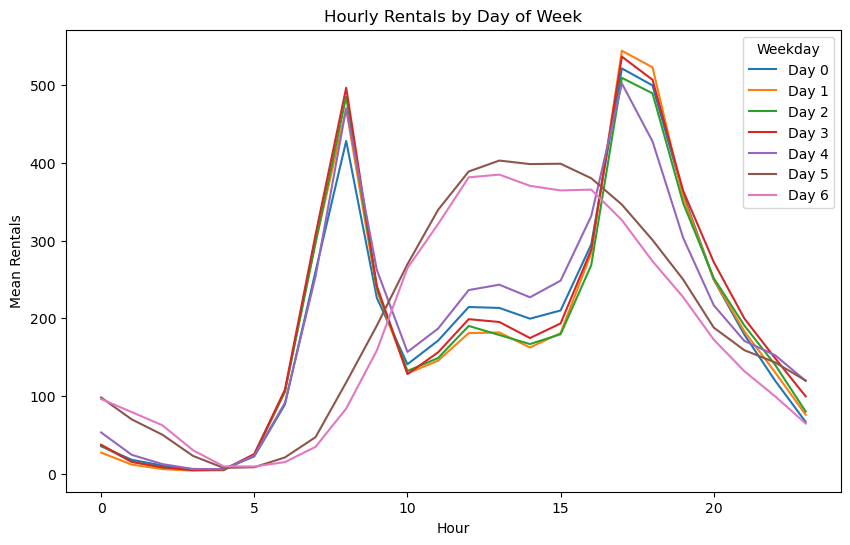

In [9]:
plt.figure(figsize=(10,6))

for d in range(7):
    temp = df[df["weekday"] == d].groupby("hour")["count"].mean()
    plt.plot(temp.index, temp.values, label=f"Day {d}")

plt.legend(title="Weekday")
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.title("Hourly Rentals by Day of Week")
plt.show()


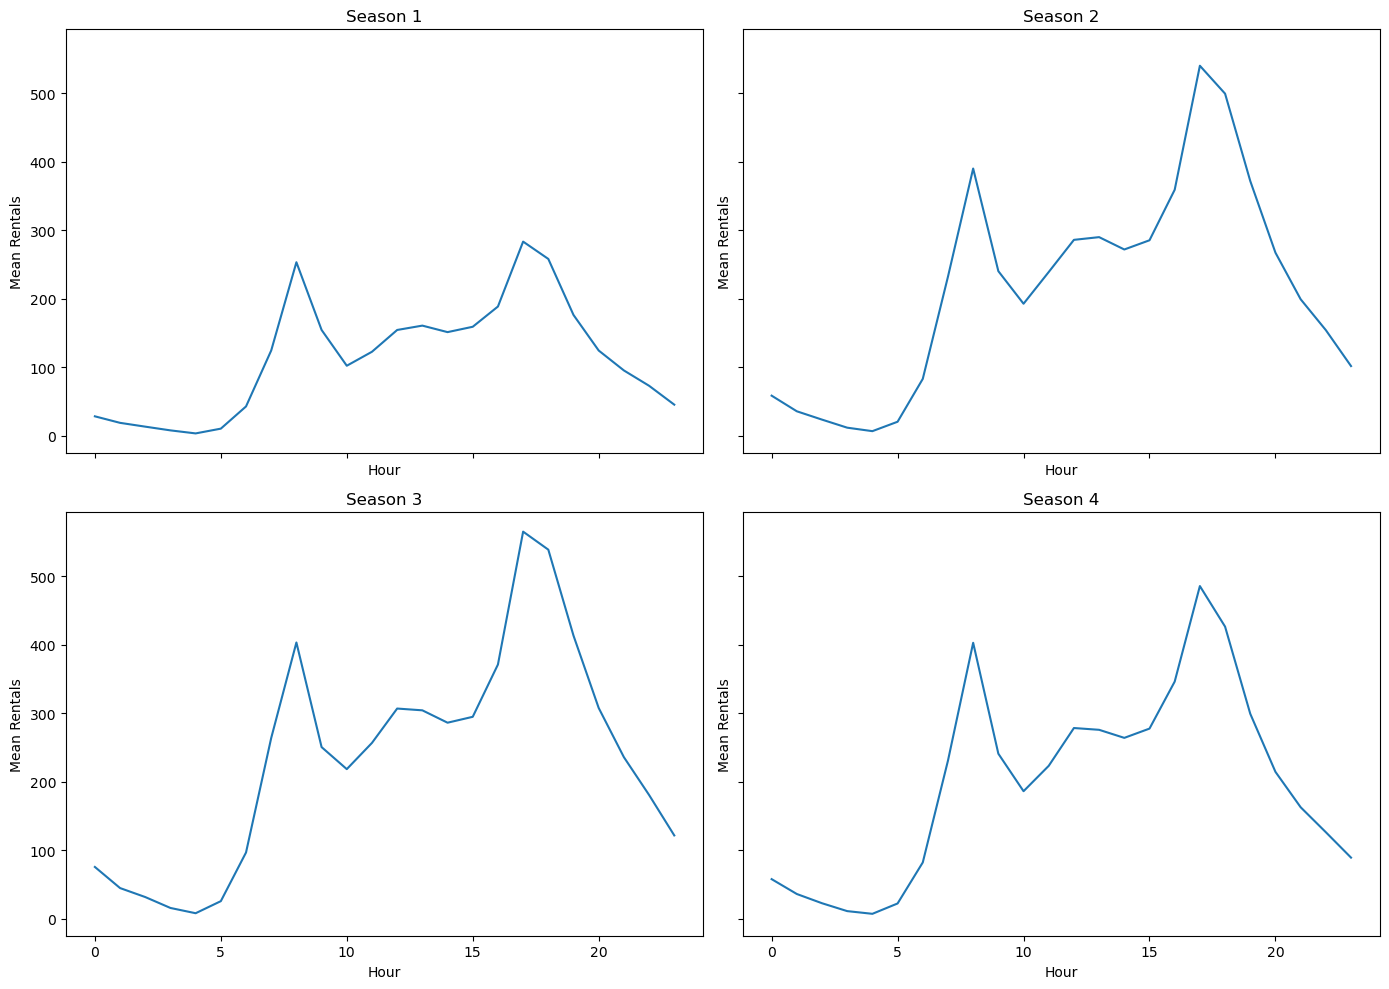

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharex=True, sharey=True)

for ax, s in zip(axes.flatten(), sorted(df["season"].unique())):
    temp = df[df["season"] == s].groupby("hour")["count"].mean()
    ax.plot(temp.index, temp.values)
    ax.set_title(f"Season {s}")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Mean Rentals")

plt.tight_layout()
plt.show()


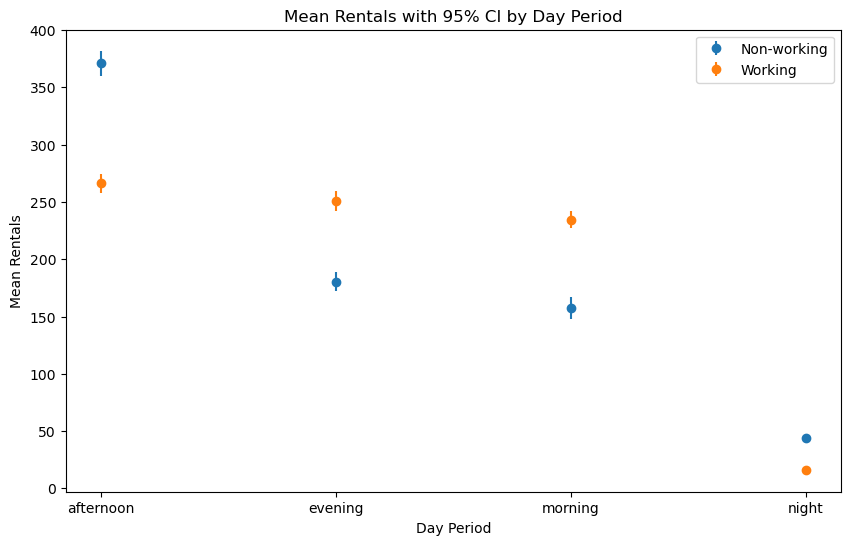

In [11]:
dp_stats = df.groupby(["day_period", "workingday"])["count"].agg(["mean", "std", "count"])
dp_stats["ci95"] = 1.96 * dp_stats["std"] / np.sqrt(dp_stats["count"])

fig, ax = plt.subplots(figsize=(10,6))

for wd in [0,1]:
    temp = dp_stats.xs(wd, level="workingday")
    ax.errorbar(
        temp.index,
        temp["mean"],
        yerr=temp["ci95"],
        fmt="o",
        label="Working" if wd==1 else "Non-working"
    )

ax.set_xlabel("Day Period")
ax.set_ylabel("Mean Rentals")
ax.set_title("Mean Rentals with 95% CI by Day Period")
ax.legend()
plt.show()


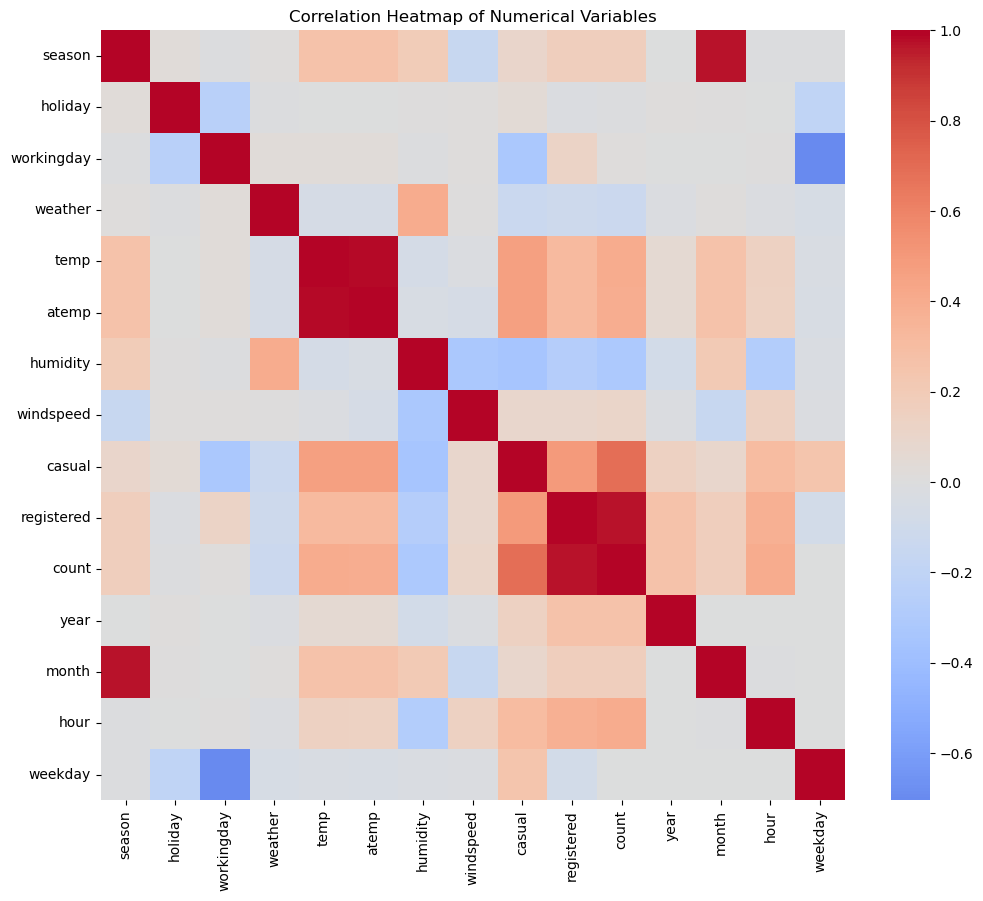

In [12]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()
